<a href="https://colab.research.google.com/github/Jondoloh/GENSIM---Topic-Modelling/blob/main/Gensim_topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GENSIM 

### Topic modelling

In [37]:
pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
!pip install nltk #installing nltk library
!pip install wordcloud #installing wordcloud library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
#importing library
import pandas as pd #loading dataframe
import numpy as np #for mathematical calculations

import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import zipfile #for extracting the zip file datasets

import gensim #library for topic modelling
from gensim.models import ldamulticore
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import nltk #natural language toolkit for preprocessing the text data
from nltk.stem import WordNetLemmatizer #used to lemmatize using wordnet's 
from nltk.stem import SnowballStemmer #used for stemming in NLP
from nltk.stem.porter import * #porter stemming

from wordcloud import WordCloud #visualization techniques for #frequently repeated. texts

nltk.download('wordnet') #database of words in more than 200 languages


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Loading data

#### If data is zipped

In [40]:
# with zipfile.ZipFile("./abcnews-date-text.csv.zip") as file_zip:
#   file_zip.extractall("./data_for_Topic_modelling")

#### if data is unzipped

In [41]:
data =pd.read_csv('https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv')
data = data[:500000] #500000 rows taken

## EDA and processing the data

In [42]:
#checking the first five rows
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [43]:
#checking the shape
data.shape

(500000, 2)

In [44]:
#delete the publish_date column since only intrested in headline_text
del data['publish_date']
data.head() #confirm deletion

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


Now we have remained with our important column which is headline_text as seen above, and here we now using wordcloud to get a look at the most frequently appearing words from our datasets in headline_text columns, this increase more understanding about the datasets, consider the code below

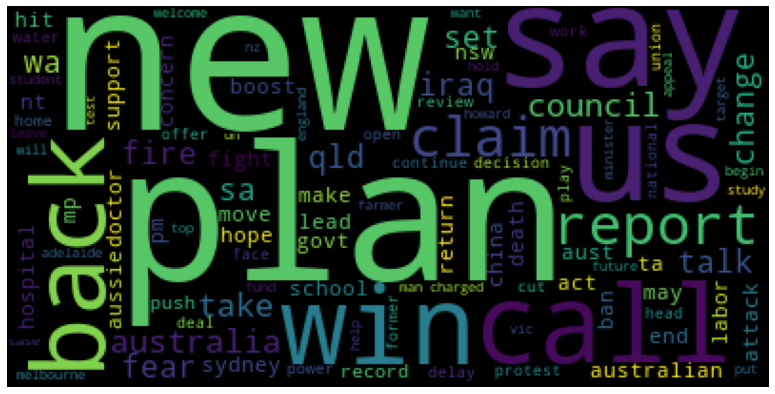

In [45]:
#word cloud visualization for the headline_text
wc = WordCloud(
    background_color='black',
    max_words = 100,
    random_state = 42,
    max_font_size=110
    )
wc.generate(' '.join(data['headline_text']))
plt.figure(figsize =(50,7))
plt.imshow(wc)
plt.axis('off')
plt.show()

We now process the data by starting with *stemming*, which is simply the process of reducing a word to its word stem that is to say affixes to suffixes and prefixes or to the roots of words known as a *lemma*. Example cared to care. Here we are using the **snowballStemmer** algorithm that we imported from **nltk**.

In [46]:
#stemming

stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
  return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

*Tokenization & lemmatization*

In [47]:
#Tokenize and lemmatize
def preprocess(text):
  result=[]
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
      #apply lemmatize_stemming on the token, then add to the results list
      result.append(lemmatize_stemming(token))
  
  return result


In [48]:
#calling the preprocess function above
processed_docs = data['headline_text'].map(preprocess)
processed_docs[:10]

0            [decid, communiti, broadcast, licenc]
1                               [wit, awar, defam]
2           [call, infrastructur, protect, summit]
3                      [staff, aust, strike, rise]
4             [strike, affect, australian, travel]
5               [ambiti, olsson, win, tripl, jump]
6           [antic, delight, record, break, barca]
7    [aussi, qualifi, stosur, wast, memphi, match]
8            [aust, address, secur, council, iraq]
9                         [australia, lock, timet]
Name: headline_text, dtype: object

**map() in pandas series examples**

In [49]:
# technologies= {
#     'Fee' :[22000,25000,23000,np.NaN,26000],
#     'Duration':['30days','50days','30days','35days','40days']
#           }
# df = pd.DataFrame(technologies)
# df

In [50]:
# def fun1(x):
#   return (x/100)

# df['Fee']=df['Fee'].map(fun1)
# df

Create a dictionary from 'processed_docs' from gensim.corpora containing the number of times a word appears in the training set, and call it a name it a dictionary, consider below code

In [51]:
dictionary = gensim.corpora.Dictionary(processed_docs)
#dictionary[23]

In [61]:
dictionary #it return the object, hence dictionary is created

In [62]:
#confirming if the dictionary is created
count = 0
for k,v in dictionary.items():
  print(k,v)
  count +=1
  if count > 5:
    break

0 broadcast
1 communiti
2 decid
3 licenc
4 awar
5 defam


Then, after having a dictionary from the above code, we have to implement bags of words model (BoW), BoW is nothing but a representation of the text that shows the occurrence of the words that are within the specified documents, this keeps the word count only and discard another thing like order or structure of the document, Therefore we create a sample of 5000

In [64]:
#create the bag of words(BOW) model for each document
document_num = 5000 #sample chosen
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

Checking Bag of Words corpus for our sample document that is (token_id, token_count)

In [65]:
bow_corpus[document_num]

[(51, 1), (87, 1), (390, 1), (3198, 1)]

## Modeling using LDA (Latent Dirichlet Allocation) from bags of words above



In [66]:
#modelling part to create topic model
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                       num_topics=10,
                                       id2word=dictionary,
                                       passes=2,
                                       workers=2)

For each topic, we will explore the words occurring in that topic and their relative weight

In [67]:
for idx,topic in lda_model.print_topics(-1):
  print('Topic: {} \nwords: {}'.format(idx,topic))
  print('\n')

Topic: 0 
words: 0.033*"plan" + 0.025*"council" + 0.019*"water" + 0.015*"job" + 0.014*"back" + 0.014*"resid" + 0.013*"south" + 0.013*"reject" + 0.011*"school" + 0.009*"river"


Topic: 1 
words: 0.050*"interview" + 0.020*"market" + 0.018*"die" + 0.015*"coast" + 0.014*"get" + 0.014*"woman" + 0.014*"gold" + 0.013*"lose" + 0.012*"polic" + 0.012*"jail"


Topic: 2 
words: 0.032*"attack" + 0.028*"kill" + 0.015*"concern" + 0.013*"bushfir" + 0.011*"releas" + 0.011*"polic" + 0.010*"drug" + 0.010*"prison" + 0.010*"sydney" + 0.010*"risk"


Topic: 3 
words: 0.046*"charg" + 0.037*"court" + 0.030*"face" + 0.027*"murder" + 0.025*"accus" + 0.018*"tell" + 0.017*"case" + 0.016*"child" + 0.014*"trial" + 0.013*"deal"


Topic: 4 
words: 0.027*"hospit" + 0.018*"take" + 0.014*"lead" + 0.012*"action" + 0.011*"teacher" + 0.011*"adelaid" + 0.011*"bail" + 0.011*"second" + 0.010*"tour" + 0.009*"threaten"


Topic: 5 
words: 0.017*"rudd" + 0.016*"australian" + 0.015*"world" + 0.015*"elect" + 0.014*"record" + 0.013*"

## Performance evaluation

In [68]:
#our test document is document number 5000
for index,score in sorted(lda_model[bow_corpus[document_num]],key=lambda tup: -1*tup[1]):
  print('\nScore: {}\t \nTopic: {}'.format(score,lda_model.print_topic(index,10)))


Score: 0.32298919558525085	 
Topic: 0.017*"rudd" + 0.016*"australian" + 0.015*"world" + 0.015*"elect" + 0.014*"record" + 0.013*"time" + 0.011*"cut" + 0.011*"wont" + 0.011*"race" + 0.011*"target"

Score: 0.31706124544143677	 
Topic: 0.018*"probe" + 0.017*"open" + 0.016*"assault" + 0.014*"blaze" + 0.012*"offer" + 0.011*"premier" + 0.011*"test" + 0.011*"final" + 0.010*"australia" + 0.009*"pakistan"

Score: 0.2199137806892395	 
Topic: 0.027*"hospit" + 0.018*"take" + 0.014*"lead" + 0.012*"action" + 0.011*"teacher" + 0.011*"adelaid" + 0.011*"bail" + 0.011*"second" + 0.010*"tour" + 0.009*"threaten"

Score: 0.0200063344091177	 
Topic: 0.039*"govt" + 0.023*"urg" + 0.019*"fund" + 0.015*"boost" + 0.012*"rise" + 0.011*"help" + 0.011*"say" + 0.011*"plan" + 0.010*"chang" + 0.010*"council"

Score: 0.020005710422992706	 
Topic: 0.033*"plan" + 0.025*"council" + 0.019*"water" + 0.015*"job" + 0.014*"back" + 0.014*"resid" + 0.013*"south" + 0.013*"reject" + 0.011*"school" + 0.009*"river"

Score: 0.0200050